### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [2]:
### Begin Assignment Here
%load_ext autoreload
%autoreload 2

In [4]:
import os
import pandas as pd
from sklearn.datasets import load_files

csv_path = 'Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv'
data_dir = 'organized_data'
categories = ['not nostalgia', 'nostalgia']

df = pd.read_csv(csv_path)

for category in categories:
    os.makedirs(os.path.join(data_dir, category), exist_ok=True)

for i, row in df.iterrows():
    category_folder = os.path.join(data_dir, row['sentiment'])
    file_path = os.path.join(category_folder, f'doc_{i}.txt')
    with open(file_path, 'w', encoding='utf-8') as f:
        f.write(row['comment'])

data = load_files(data_dir, encoding='utf-8', categories=categories)
print(f"Loaded {len(data.data)} documents with categories: {data.target_names}")


Loaded 1500 documents with categories: ['nostalgia', 'not nostalgia']


In [5]:
data.data[0:2]

["I like this song very much, when I was in the beginning of my teenage years their was this young fellow I once knew sang it to me. His name was Walter Basco, Skipper Basco's Older brother. ? Skip (this was his nickname Skip)(my nickname was Ginny, still is but back then I spelt it Ginnie)) and I graduated from 8th grade together along with some other students back in 1950's ? My name then was Virginia Maddox-- now it's Havu, has been for going on 58 happy years.. ? :)",
 'Nostalgia and sentimentality to the deceased']

In [6]:
data.target_names

['nostalgia', 'not nostalgia']

In [7]:
len(data.data)

1500

In [8]:
len(data.filenames)

1500

In [14]:
print("\n".join(data.data[0].split("\n")))

I like this song very much, when I was in the beginning of my teenage years their was this young fellow I once knew sang it to me. His name was Walter Basco, Skipper Basco's Older brother. ? Skip (this was his nickname Skip)(my nickname was Ginny, still is but back then I spelt it Ginnie)) and I graduated from 8th grade together along with some other students back in 1950's ? My name then was Virginia Maddox-- now it's Havu, has been for going on 58 happy years.. ? :)


In [16]:
# category of first 10 documents.
data.target[0:10]

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [18]:
for t in data.target[:10]:
    print(data.target_names[t])

nostalgia
nostalgia
not nostalgia
nostalgia
not nostalgia
not nostalgia
nostalgia
nostalgia
nostalgia
not nostalgia


In [20]:
for comment in data.data[:3]:
    print(comment)

I like this song very much, when I was in the beginning of my teenage years their was this young fellow I once knew sang it to me. His name was Walter Basco, Skipper Basco's Older brother. ? Skip (this was his nickname Skip)(my nickname was Ginny, still is but back then I spelt it Ginnie)) and I graduated from 8th grade together along with some other students back in 1950's ? My name then was Virginia Maddox-- now it's Havu, has been for going on 58 happy years.. ? :)
Nostalgia and sentimentality to the deceased
Honey running over butter  still cant describe the voice


In [22]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(data), columns= ['comment'])

In [23]:
len(X)

1500

In [25]:
X[0:2]

,comment
0,"I like this song very much, when I was in the ..."
1,Nostalgia and sentimentality to the deceased


In [28]:
for t in X["comment"][:2]:
    print(t)

I like this song very much, when I was in the beginning of my teenage years their was this young fellow I once knew sang it to me. His name was Walter Basco, Skipper Basco's Older brother. ? Skip (this was his nickname Skip)(my nickname was Ginny, still is but back then I spelt it Ginnie)) and I graduated from 8th grade together along with some other students back in 1950's ? My name then was Virginia Maddox-- now it's Havu, has been for going on 58 happy years.. ? :)
Nostalgia and sentimentality to the deceased


In [30]:
# add category to the dataframe
X['category'] = data.target

In [32]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, data))

In [34]:
X[0:10]

,comment,category,category_name
0,"I like this song very much, when I was in the ...",0,nostalgia
1,Nostalgia and sentimentality to the deceased,0,nostalgia
2,Honey running over butter still cant describe...,1,not nostalgia
3,This song always bring me back to my childhood,0,nostalgia
4,Beautiful and I am offering to all our dear fr...,1,not nostalgia
5,What a beautiful song. I would love to fall In...,1,not nostalgia
6,childhood favorite finally find the song. ton...,0,nostalgia
7,I was 14 when I first heard 17 year steve winw...,0,nostalgia
8,love this song bring back good memories...,0,nostalgia
9,"the voice of a real singer, full of emotion an...",1,not nostalgia


In [36]:
# a simple query
X[:10][["comment","category_name"]]

,comment,category_name
0,"I like this song very much, when I was in the ...",nostalgia
1,Nostalgia and sentimentality to the deceased,nostalgia
2,Honey running over butter still cant describe...,not nostalgia
3,This song always bring me back to my childhood,nostalgia
4,Beautiful and I am offering to all our dear fr...,not nostalgia
5,What a beautiful song. I would love to fall In...,not nostalgia
6,childhood favorite finally find the song. ton...,nostalgia
7,I was 14 when I first heard 17 year steve winw...,nostalgia
8,love this song bring back good memories...,nostalgia
9,"the voice of a real singer, full of emotion an...",not nostalgia


In [38]:
X[-10:]

,comment,category,category_name
1490,Roy is the man will be the man a wonderful per...,1,not nostalgia
1491,You can never go back to the good old days. Bu...,0,nostalgia
1492,this was my grandfathers favorite artist i abs...,0,nostalgia
1493,it's sad this is such a beautiful song when yo...,1,not nostalgia
1494,Love the iconic images!! just beautiful!!! th...,1,not nostalgia
1495,By far my favorite singer of all time. So pure...,1,not nostalgia
1496,"Last Monday, I cried for 30 minutes straight l...",1,not nostalgia
1497,Never an intro will ever match this masterpiec...,1,not nostalgia
1498,Hearing him makes me want to cry. He was my G...,0,nostalgia
1499,When I was little this was the BEST song I hav...,0,nostalgia


In [40]:
X.head(10)

,comment,category,category_name
0,"I like this song very much, when I was in the ...",0,nostalgia
1,Nostalgia and sentimentality to the deceased,0,nostalgia
2,Honey running over butter still cant describe...,1,not nostalgia
3,This song always bring me back to my childhood,0,nostalgia
4,Beautiful and I am offering to all our dear fr...,1,not nostalgia
5,What a beautiful song. I would love to fall In...,1,not nostalgia
6,childhood favorite finally find the song. ton...,0,nostalgia
7,I was 14 when I first heard 17 year steve winw...,0,nostalgia
8,love this song bring back good memories...,0,nostalgia
9,"the voice of a real singer, full of emotion an...",1,not nostalgia


In [42]:
X.tail(10)

,comment,category,category_name
1490,Roy is the man will be the man a wonderful per...,1,not nostalgia
1491,You can never go back to the good old days. Bu...,0,nostalgia
1492,this was my grandfathers favorite artist i abs...,0,nostalgia
1493,it's sad this is such a beautiful song when yo...,1,not nostalgia
1494,Love the iconic images!! just beautiful!!! th...,1,not nostalgia
1495,By far my favorite singer of all time. So pure...,1,not nostalgia
1496,"Last Monday, I cried for 30 minutes straight l...",1,not nostalgia
1497,Never an intro will ever match this masterpiec...,1,not nostalgia
1498,Hearing him makes me want to cry. He was my G...,0,nostalgia
1499,When I was little this was the BEST song I hav...,0,nostalgia


In [44]:
# using loc (by label)
X.loc[:10, 'comment']

0     I like this song very much, when I was in the ...
1          Nostalgia and sentimentality to the deceased
2     Honey running over butter  still cant describe...
3        This song always bring me back to my childhood
4     Beautiful and I am offering to all our dear fr...
5     What a beautiful song. I would love to fall In...
6     childhood favorite  finally find the song. ton...
7     I was 14 when I first heard 17 year steve winw...
8            love this song bring back good memories...
9     the voice of a real singer, full of emotion an...
10    It's incredible how this kind of song makes me...
Name: comment, dtype: object

In [46]:
# using iloc (by position)
X.iloc[:10, 0] # 0 -> "comment", 1 -> "category". ...

0    I like this song very much, when I was in the ...
1         Nostalgia and sentimentality to the deceased
2    Honey running over butter  still cant describe...
3       This song always bring me back to my childhood
4    Beautiful and I am offering to all our dear fr...
5    What a beautiful song. I would love to fall In...
6    childhood favorite  finally find the song. ton...
7    I was 14 when I first heard 17 year steve winw...
8           love this song bring back good memories...
9    the voice of a real singer, full of emotion an...
Name: comment, dtype: object

In [48]:
#Answer here
X.query("category == 1")["category_name"]

2       not nostalgia
4       not nostalgia
5       not nostalgia
9       not nostalgia
10      not nostalgia
            ...      
1493    not nostalgia
1494    not nostalgia
1495    not nostalgia
1496    not nostalgia
1497    not nostalgia
Name: category_name, Length: 750, dtype: object

In [50]:
print(X[X["category_name"] == "nostalgia"].iloc[::10][:5])

                                              comment  category category_name
0   I like this song very much, when I was in the ...         0     nostalgia
20  I remember going to their live concert at the ...         0     nostalgia
43  Music memories, playing this on my twin casset...         0     nostalgia
63  Reminds me of being a little girl, listening t...         0     nostalgia
82  kyrill morgan i use to impersonate  mr B back ...         0     nostalgia


In [52]:
X.isnull()

,comment,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1495,False,False,False
1496,False,False,False
1497,False,False,False
1498,False,False,False


In [54]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,comment,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [56]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

In [58]:
dummy_series = pd.Series(["dummy_record", 1], index=["comment", "category"])

In [60]:
dummy_series

comment     dummy_record
category               1
dtype: object

In [62]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

,comment,category
0,dummy_record,1


In [64]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [66]:
# check if the records was commited into result
len(result_with_series)

1501

In [68]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,comment,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [70]:
# dummy record as dictionary format
dummy_dict = [{'comment': 'dummy_record',
               'category': 1
              }]

In [72]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [74]:
len(X)

1501

In [76]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,comment,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [78]:
X.dropna(inplace=True)

In [80]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,comment,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [82]:
len(X)

1500

In [84]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [86]:
sum(X.duplicated())

1

In [88]:
sum(X.duplicated('comment'))

1

In [90]:
dummy_duplicate_dict = [{
                             'comment': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'comment': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [92]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [94]:
len(X)

1502

In [96]:
sum(X.duplicated())

2

In [98]:
# keep=False -> drop both data
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [100]:
len(X)

1498

In [102]:
X_sample = X.sample(n=1000) #random state

In [104]:
len(X_sample)

1000

In [106]:
X_sample[0:4]

,comment,category,category_name
1094,"In later days women are more beautiful, more p...",1,not nostalgia
1395,Brought back some crazy memories. Thank you fo...,0,nostalgia
765,"I'm reading Pete's autobiography now (well, li...",1,not nostalgia
1432,bring back memories it's a sin to be lonely ...,0,nostalgia


In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
categories

['not nostalgia', 'nostalgia']

category_name
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

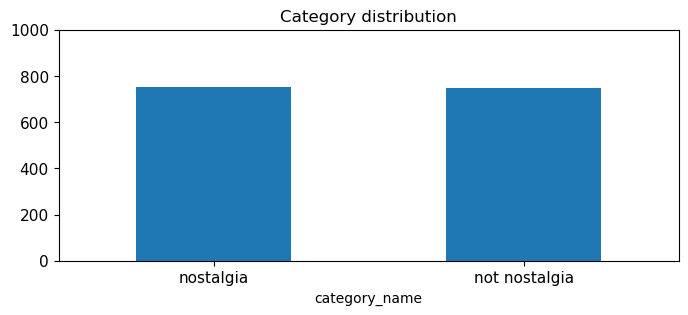

In [112]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
not nostalgia    512
nostalgia        488
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

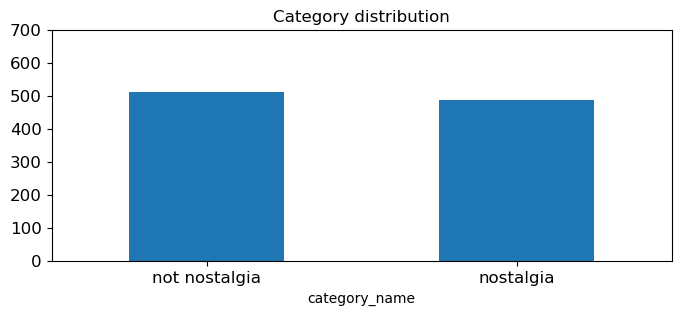

In [114]:
print(X_sample.category_name.value_counts())
plt.style.use('default')
# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 700], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

In [116]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

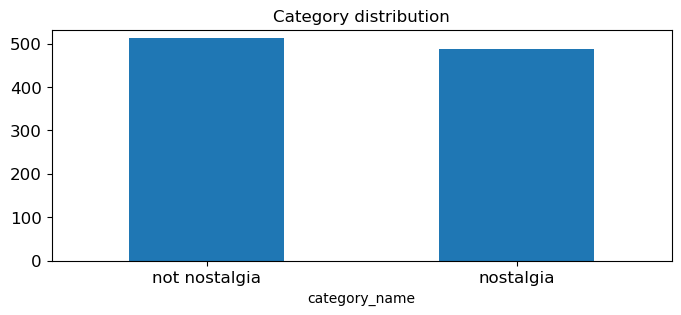

In [118]:
upper_bound = max(X_sample.category_name.value_counts() + 20)
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound],
                                           rot = 0, fontsize = 12, figsize = (8,3))

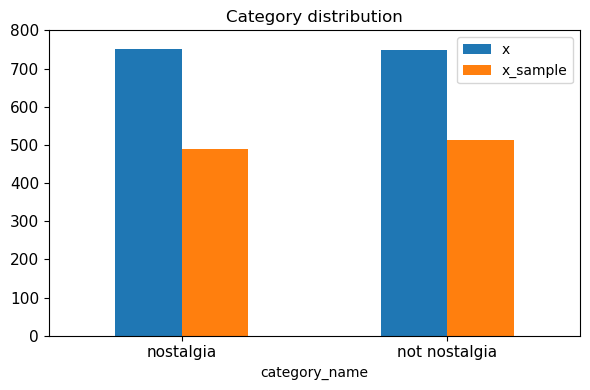

In [120]:
x_counts = X.category_name.value_counts()
x_sample_counts = X_sample.category_name.value_counts()

df_counts = pd.DataFrame({
    'x': x_counts,
    'x_sample': x_sample_counts
})

df_counts.plot(kind='bar', 
               title='Category distribution',
               ylim=[0, 800], 
               rot=0, fontsize=11, figsize=(6, 4))

plt.tight_layout()
plt.show()

In [122]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /Users/lin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [123]:
# takes a like a minute or two to process
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [124]:
X[0:4]["unigrams"]

0    [I, like, this, song, very, much, ,, when, I, ...
1    [Nostalgia, and, sentimentality, to, the, dece...
2    [Honey, running, over, butter, still, cant, de...
3    [This, song, always, bring, me, back, to, my, ...
Name: unigrams, dtype: object

In [126]:
X[0:4]

,comment,category,category_name,unigrams
0,"I like this song very much, when I was in the ...",0,nostalgia,"[I, like, this, song, very, much, ,, when, I, ..."
1,Nostalgia and sentimentality to the deceased,0,nostalgia,"[Nostalgia, and, sentimentality, to, the, dece..."
2,Honey running over butter still cant describe...,1,not nostalgia,"[Honey, running, over, butter, still, cant, de..."
3,This song always bring me back to my childhood,0,nostalgia,"[This, song, always, bring, me, back, to, my, ..."


In [130]:
list(X[0:1]['unigrams'])

[['I',
  'like',
  'this',
  'song',
  'very',
  'much',
  ',',
  'when',
  'I',
  'was',
  'in',
  'the',
  'beginning',
  'of',
  'my',
  'teenage',
  'years',
  'their',
  'was',
  'this',
  'young',
  'fellow',
  'I',
  'once',
  'knew',
  'sang',
  'it',
  'to',
  'me',
  '.',
  'His',
  'name',
  'was',
  'Walter',
  'Basco',
  ',',
  'Skipper',
  'Basco',
  "'s",
  'Older',
  'brother',
  '.',
  '?',
  'Skip',
  '(',
  'this',
  'was',
  'his',
  'nickname',
  'Skip',
  ')',
  '(',
  'my',
  'nickname',
  'was',
  'Ginny',
  ',',
  'still',
  'is',
  'but',
  'back',
  'then',
  'I',
  'spelt',
  'it',
  'Ginnie',
  ')',
  ')',
  'and',
  'I',
  'graduated',
  'from',
  '8th',
  'grade',
  'together',
  'along',
  'with',
  'some',
  'other',
  'students',
  'back',
  'in',
  '1950',
  "'s",
  '?',
  'My',
  'name',
  'then',
  'was',
  'Virginia',
  'Maddox',
  '--',
  'now',
  'it',
  "'s",
  'Havu',
  ',',
  'has',
  'been',
  'for',
  'going',
  'on',
  '58',
  'happy',
  'y

In [132]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1969)	1
  (0, 3300)	3
  (0, 3044)	1
  (0, 3504)	1
  (0, 2237)	1
  (0, 3610)	1
  (0, 3570)	6
  (0, 1733)	2
  (0, 3284)	1
  (0, 425)	1
  (0, 2341)	1
  (0, 2254)	3
  (0, 3258)	1
  (0, 3704)	2
  (0, 3286)	1
  (0, 3714)	1
  (0, 1278)	1
  (0, 2358)	1
  (0, 1890)	1
  (0, 2821)	1
  (0, 1804)	3
  (0, 3336)	1
  (0, 2114)	1
  (0, 1651)	2
  (0, 2260)	2
  :	:
  (0, 3079)	1
  (0, 1443)	1
  (0, 258)	1
  (0, 1487)	1
  (0, 1386)	1
  (0, 157)	1
  (0, 1485)	1
  (0, 3340)	1
  (0, 238)	1
  (0, 3650)	1
  (0, 3034)	1
  (0, 2377)	1
  (0, 3160)	1
  (0, 23)	1
  (0, 3522)	1
  (0, 2056)	1
  (0, 2328)	1
  (0, 1594)	1
  (0, 1584)	1
  (0, 420)	1
  (0, 1347)	1
  (0, 1468)	1
  (0, 2357)	1
  (0, 125)	1
  (0, 1573)	1


In [134]:
count_vect.get_feature_names_out()[3700]

'yardbirds'

In [136]:
count_vect.get_feature_names_out()[3248]

'team'

In [138]:
count_vect.get_feature_names_out()[2938]

'should'

In [140]:
count_vect.get_feature_names_out()[192]

'admit'

In [142]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [144]:
# How do we turn our array[0] comment document into a tokenized text using the build_analyzer()?
analyze(X.comment[0])

['like',
 'this',
 'song',
 'very',
 'much',
 'when',
 'was',
 'in',
 'the',
 'beginning',
 'of',
 'my',
 'teenage',
 'years',
 'their',
 'was',
 'this',
 'young',
 'fellow',
 'once',
 'knew',
 'sang',
 'it',
 'to',
 'me',
 'his',
 'name',
 'was',
 'walter',
 'basco',
 'skipper',
 'basco',
 'older',
 'brother',
 'skip',
 'this',
 'was',
 'his',
 'nickname',
 'skip',
 'my',
 'nickname',
 'was',
 'ginny',
 'still',
 'is',
 'but',
 'back',
 'then',
 'spelt',
 'it',
 'ginnie',
 'and',
 'graduated',
 'from',
 '8th',
 'grade',
 'together',
 'along',
 'with',
 'some',
 'other',
 'students',
 'back',
 'in',
 '1950',
 'my',
 'name',
 'then',
 'was',
 'virginia',
 'maddox',
 'now',
 'it',
 'havu',
 'has',
 'been',
 'for',
 'going',
 'on',
 '58',
 'happy',
 'years']

In [146]:
X_counts.shape

(1498, 3730)

In [148]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [150]:
X_counts.shape

(1498, 3730)

In [152]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [154]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [156]:
# Answer here
count_vect.get_feature_names_out()[37:38]

array(['1966'], dtype=object)

In [158]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [160]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [162]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

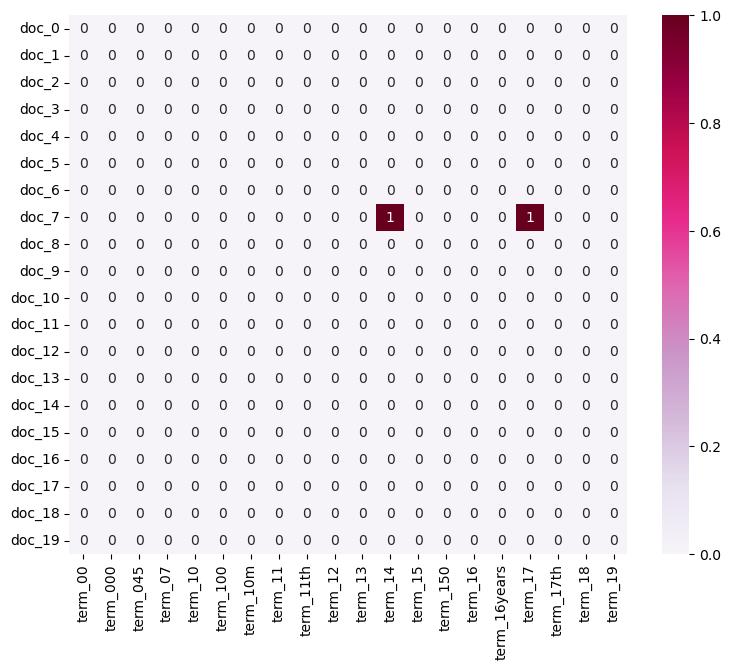

In [164]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

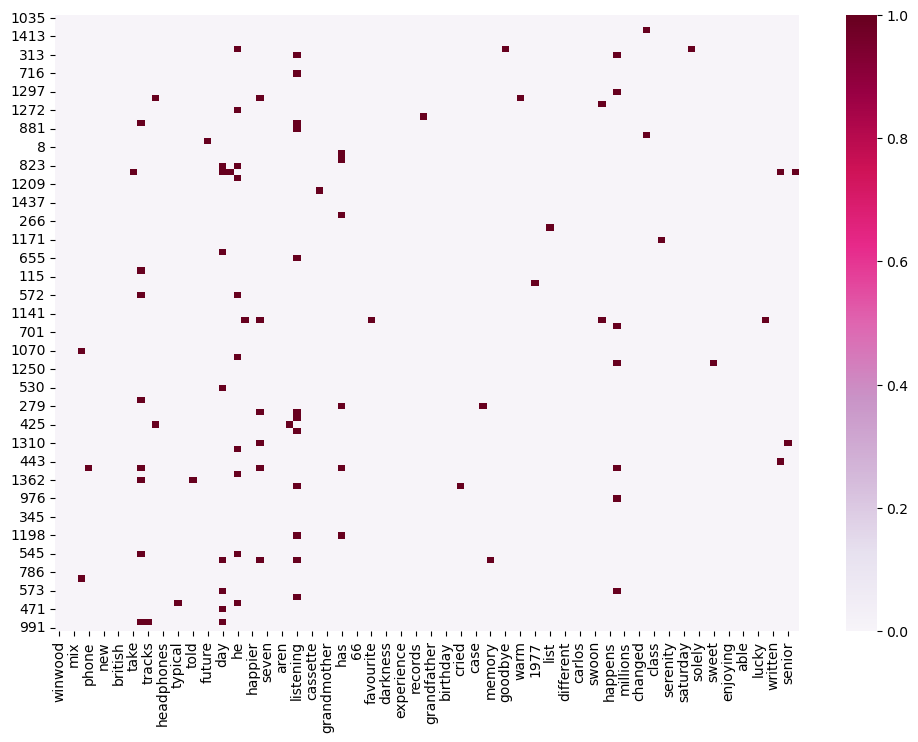

In [167]:
import numpy as np
frequency_threshold = 2
term_frequencies = X_counts.sum(axis=0).A1

filtered_term_indices = np.where(term_frequencies >= frequency_threshold)[0]
sampled_term_indices = np.random.choice(filtered_term_indices, 100, replace=False)
sampled_doc_indices = np.random.choice(X.index, 100, replace=False)

sampled_plot_z = X_counts[sampled_doc_indices, :][:, sampled_term_indices].toarray()
sampled_plot_x = count_vect.get_feature_names_out()[sampled_term_indices]
sampled_plot_y = X.iloc[sampled_doc_indices].index

df_todraw = pd.DataFrame(sampled_plot_z, columns=sampled_plot_x, index=sampled_plot_y)
plt.subplots(figsize=(12, 8))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=False)

In [169]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [171]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [173]:
int(term_frequencies[0]) #sum of first term: 00

1

/var/folders/f5/qf0c5g2x3z59ykyp4p7vd0qw0000gn/T/ipykernel_69374/3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


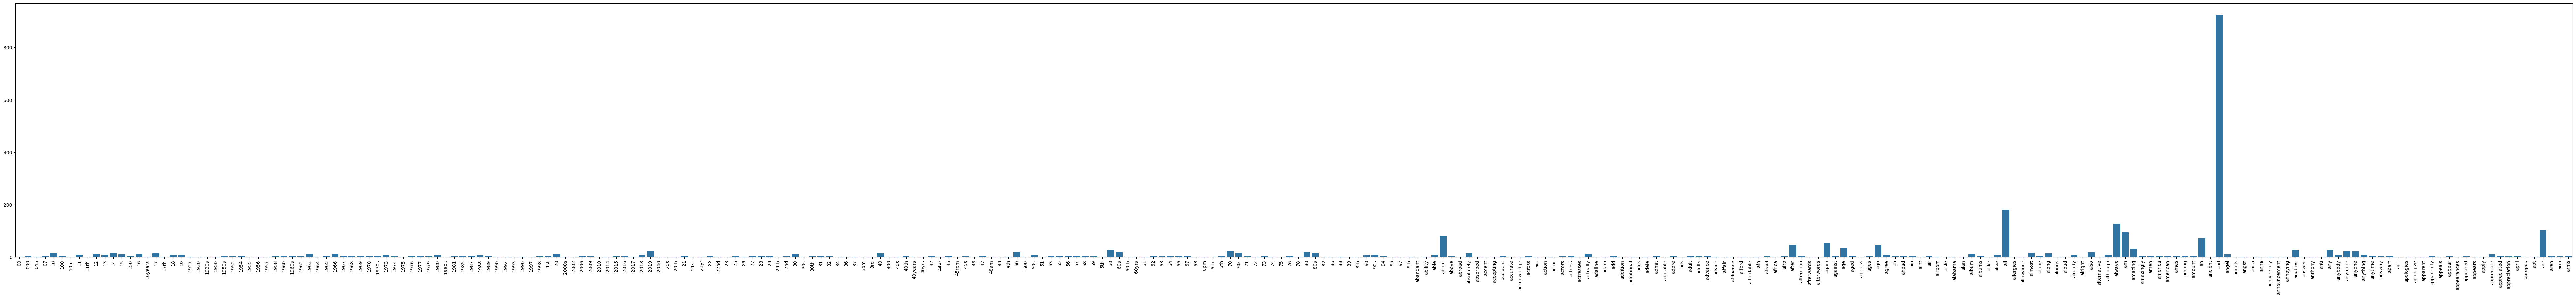

In [175]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

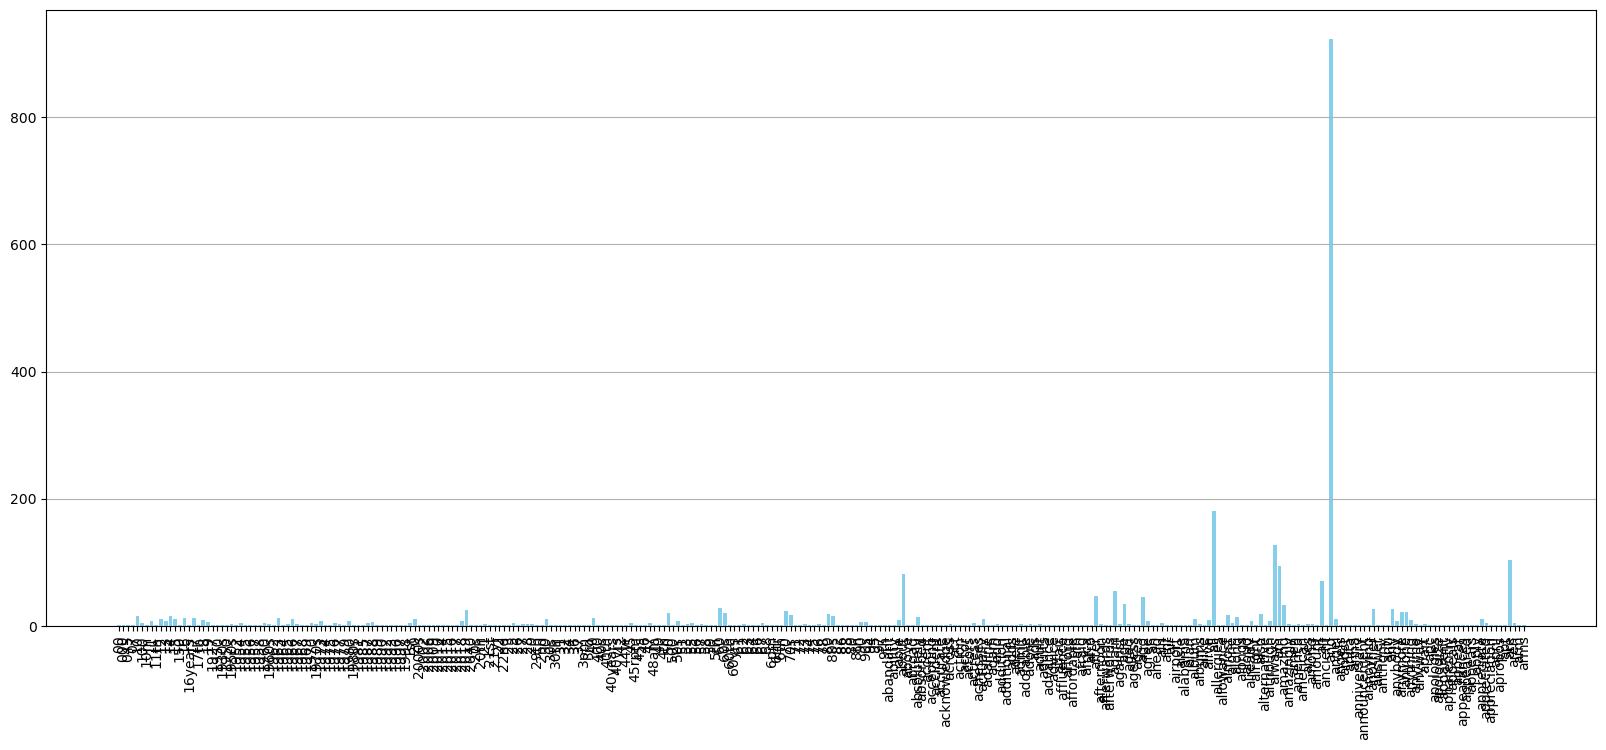

In [177]:
terms = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

plt.figure(figsize=(20, 8))
bars = plt.bar(terms, frequencies, color='skyblue')

plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()

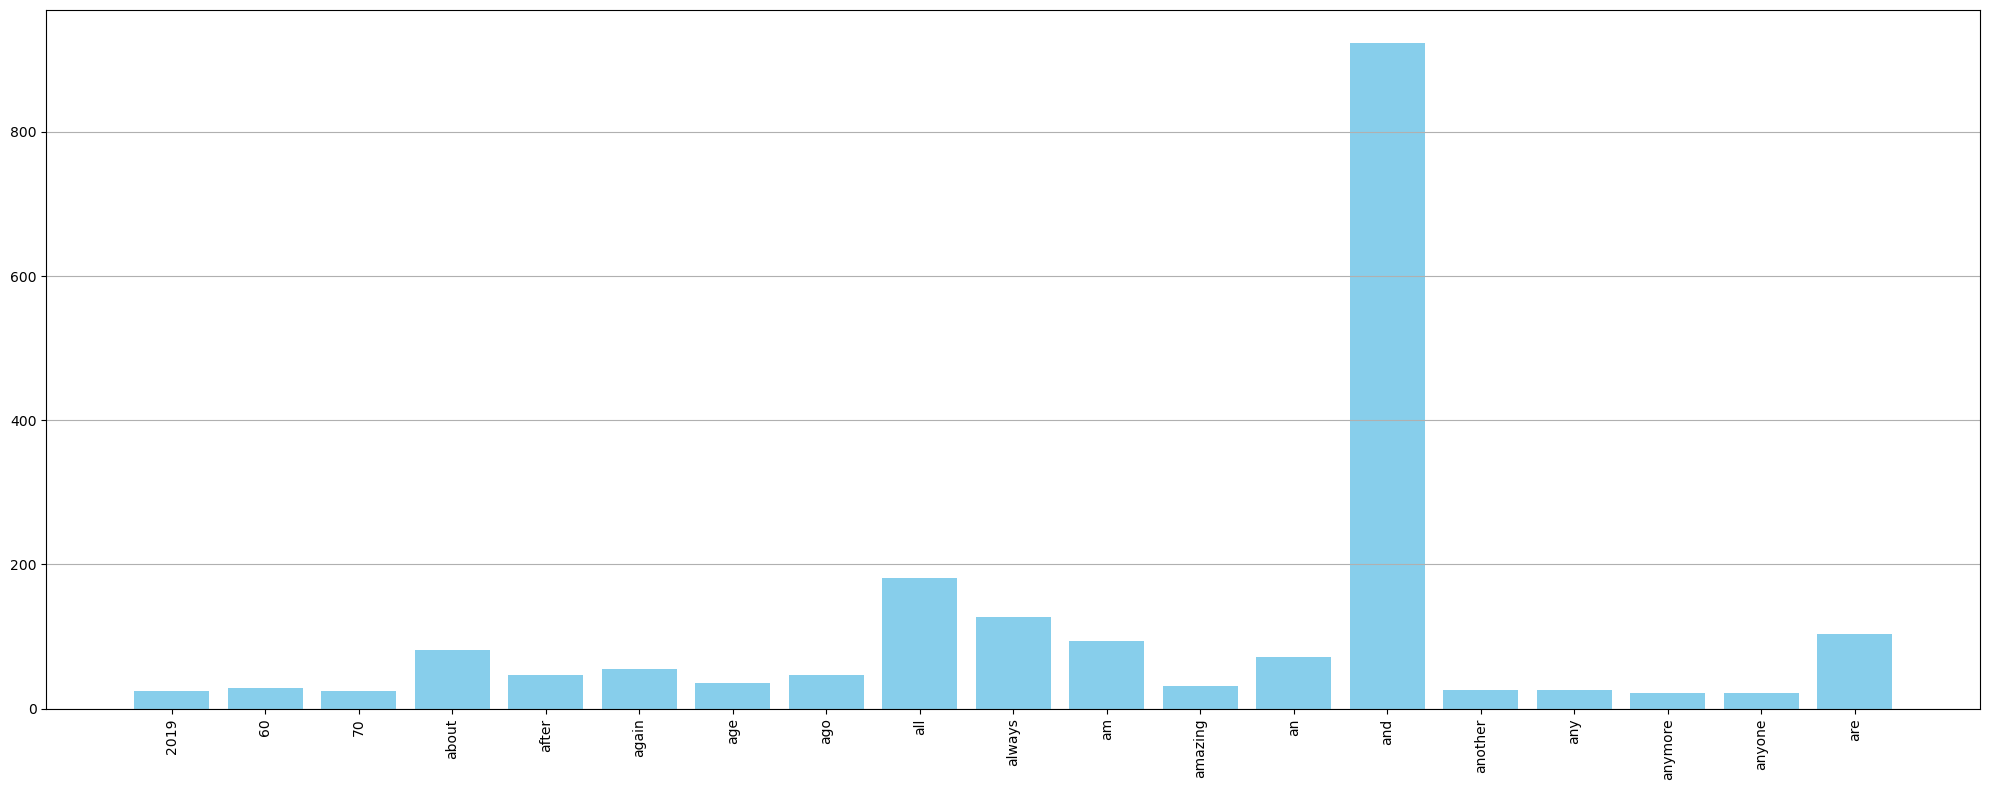

In [181]:
frequency_threshold = 20

terms = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

filtered_terms = [term for term, freq in zip(terms, frequencies) if freq > frequency_threshold]
filtered_frequencies = [freq for freq in frequencies if freq > frequency_threshold]

plt.figure(figsize=(20, 8))
bars = plt.bar(filtered_terms, filtered_frequencies, color='skyblue')

plt.xticks(rotation=90)

plt.grid(axis='y')

plt.tight_layout()
plt.show()

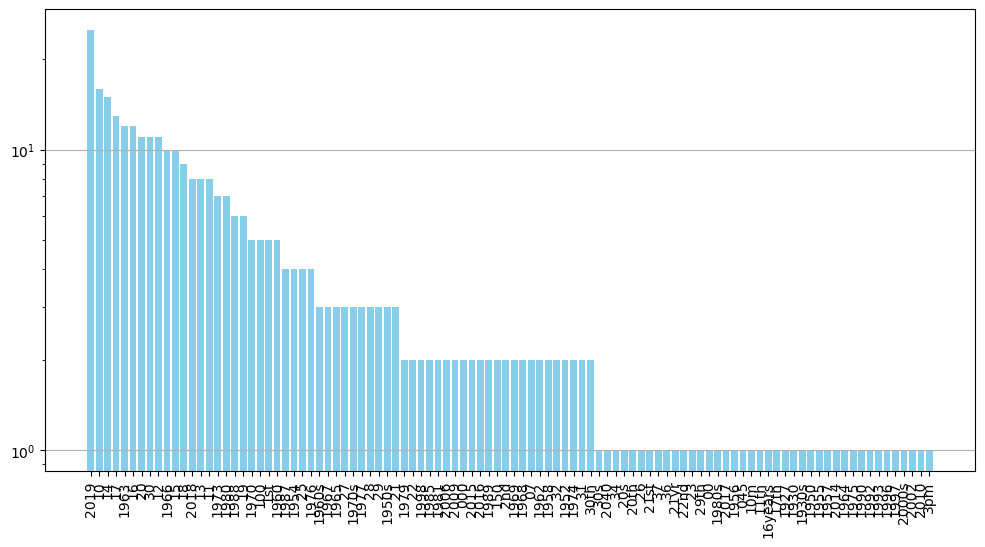

In [183]:
terms = count_vect.get_feature_names_out()[:100]
frequencies = term_frequencies[:100]
data = pd.DataFrame({
    'Term': terms,
    'Frequency': frequencies
})

data = data.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(data['Term'], data['Frequency'], color='skyblue')
plt.xticks(rotation=90)

plt.yscale('log')
plt.grid(axis='y')

plt.show()

In [185]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/f5/qf0c5g2x3z59ykyp4p7vd0qw0000gn/T/ipykernel_69374/2166548998.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


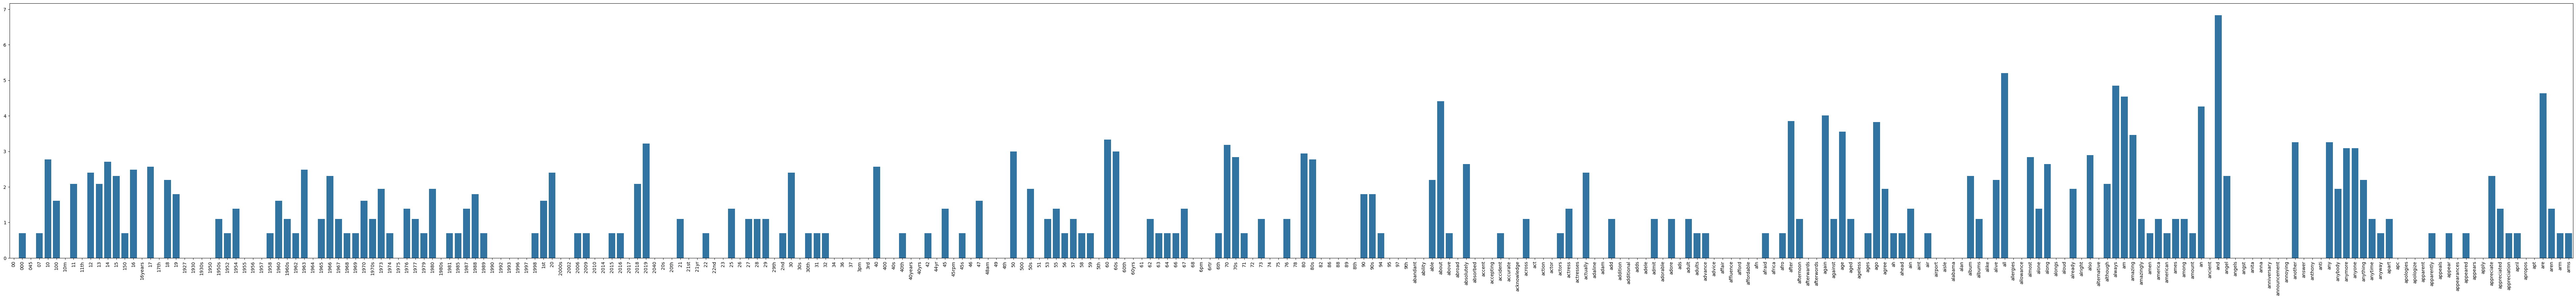

In [187]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

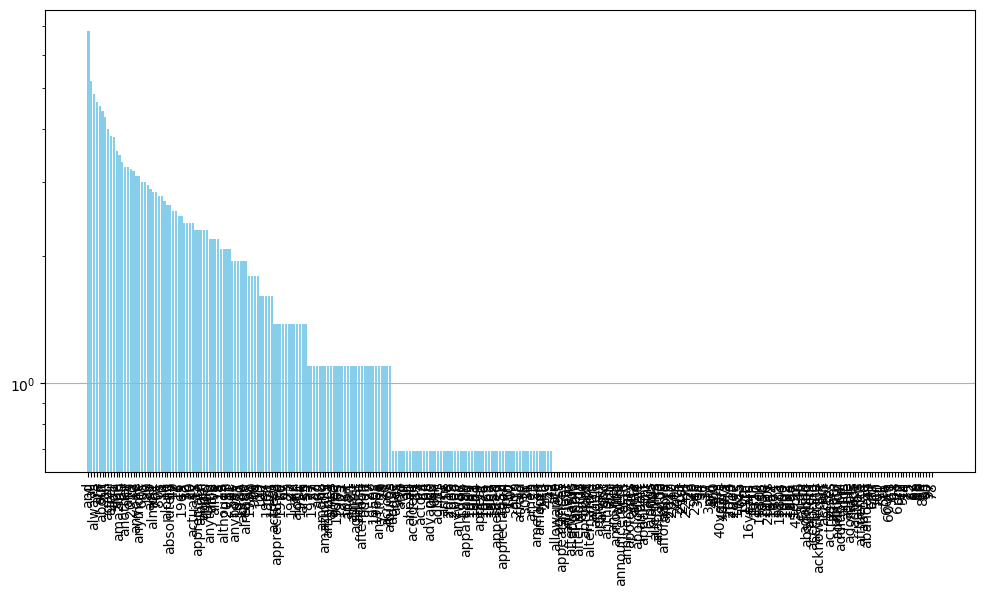

In [189]:
data = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:300],
    'Frequency': term_frequencies_log[:300]
})

data = data.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(data['Term'], data['Frequency'], color='skyblue')
plt.xticks(rotation=90)

plt.yscale('log')
plt.grid(axis='y')

plt.show()

In [191]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])


In [193]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


,07,10,11,11th,12,13,14,15,16,17,...,young,younger,youngster,your,yours,youth,youthful,youtube,yrs,yup
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


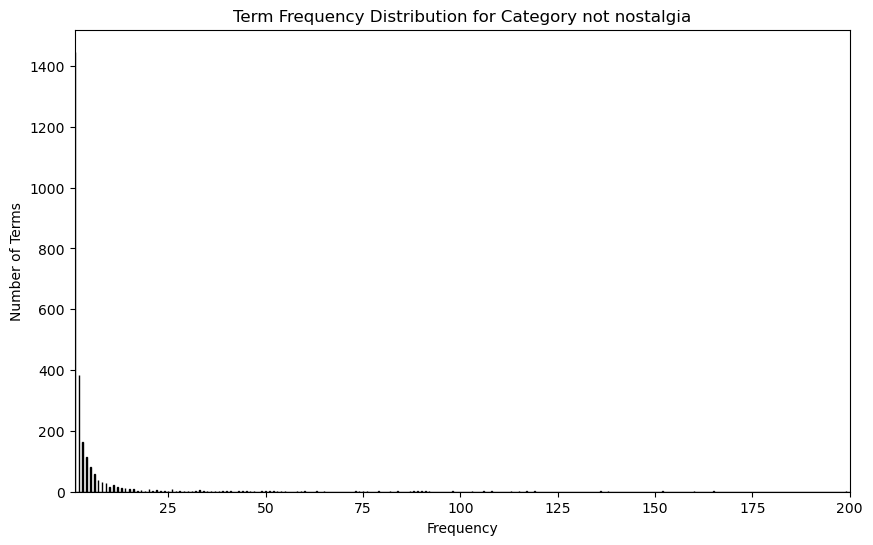

In [195]:
 # Sum over all documents to get total frequency for each word
category_number=1 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [197]:
category_number=1 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'on', 'not', 'be', 'what', 'can', 'me', 'voice', 'just', 'as', 'songs', 'beautiful', 'her', 'time', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'now', 'much', 'about', 'never', 'who', 'really', 'if', 'we', 'more', 'best', 'ever', 'by', 'thank', 'think', 'would', 'only', 'how', 'don', 'still', 'has', 'very', 'there', 'am', 'out', 'him', 'these', 'could', 'up', 'old', 'hear', 'do', 'listen', 'singer', 'an', 'had', 'many', 'here', 'such', 'version', 'too', 'today', 'been', 'most', 'get', 'your', 'people', 'world', 'man', 'video', 'some', 'heard', 'sing', 'listening', 'real', 'years', 'were', 'than', 'singing', 'heart', 'nice', 'their', 'better', 'life', 'day', 'its', 'then', 'way', 'sad', 'those',

In [199]:
category_number=1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone']


In [209]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(filt_term_document_dfs, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = filt_term_document_dfs.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # Return the DataFrame without the filtered words
    return filt_term_document_dfs.drop(columns=words_to_remove)

# Apply the filtering function to each category
filtered_term_document_dfs = {}

for category in categories:
    filtered_term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])
term_document_dfs=filtered_term_document_dfs
# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filtered_term_document_dfs[categories[category_number]]


Filtered Term-Document Frequency DataFrame for Category nostalgia:


,07,10,11,11th,12,13,14,15,16,17,...,yo,yokel,younger,youngster,your,yours,youth,youthful,youtube,yrs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
from PAMI.extras.convert.DF2DB import DF2DB

for category in filt_term_document_dfs:
    category_safe = category.replace('.', '_')
    obj = DF2DB(filt_term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 750
Number of items : 2295
Minimum Transaction Size : 3
Average Transaction Size : 21.644
Maximum Transaction Size : 70
Standard Deviation Transaction Size : 13.110095245013795
Variance in Transaction Sizes : 172.1040694259012
Sparsity : 0.9905690631808279


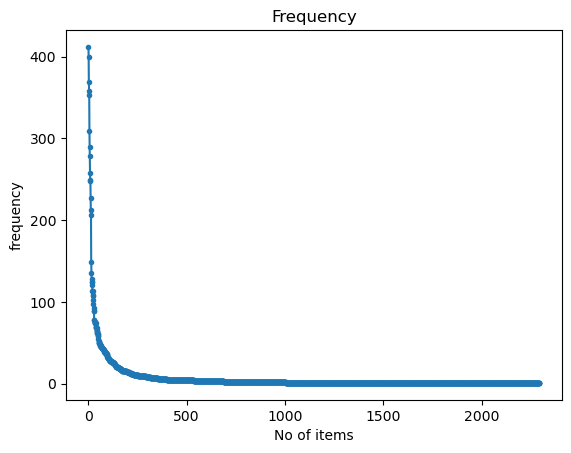

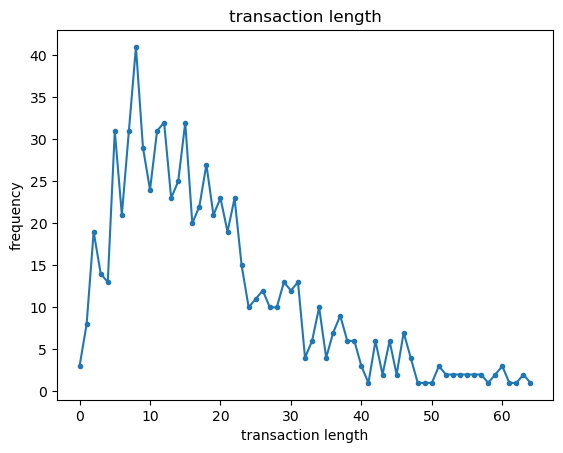

In [227]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 748
Number of items : 2602
Minimum Transaction Size : 4
Average Transaction Size : 20.060160427807485
Maximum Transaction Size : 71
Standard Deviation Transaction Size : 10.370044579132406
Variance in Transaction Sizes : 107.68178417770905
Sparsity : 0.9922904840784752


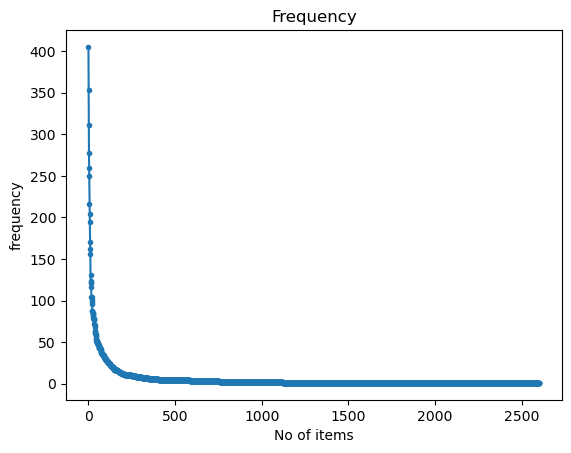

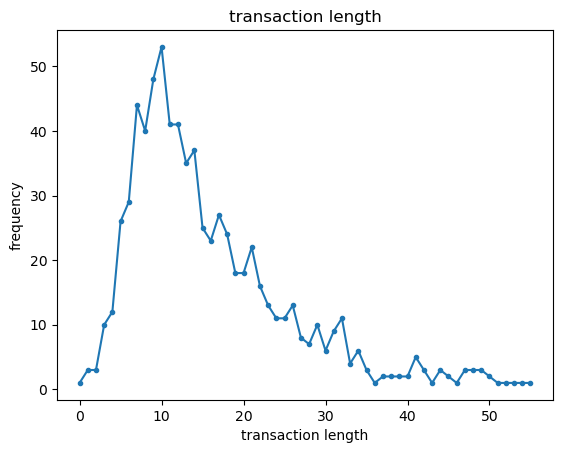

In [229]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [231]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nos= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nos))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 71737
Runtime: 0.5789890289306641


In [233]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nos

,Patterns,Support
0,along,9
1,together,9
2,together and,9
3,find,9
4,yes,9
...,...,...
71732,the my this,123
71733,the this,212
71734,my,400
71735,my this,252


In [235]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 9697
Runtime: 0.1314091682434082


In [239]:
obj2.save('freq_patterns_not_nostalgia.txt') #save the patterns
frequentPatternsDF_not_nostalgia

,Patterns,Support
0,soul,9
1,ll,9
2,wonder,9
3,please,9
4,year,9
...,...,...
9692,and this the,87
9693,and the,179
9694,this,353
9695,this the,184


In [241]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nos, frequentPatternsDF_not_nostalgia]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                      Patterns  Support
68309                    to my      227
66060                 memories      227
68304                  song my      212
68313                 the this      212
68311                   the my      192
...                        ...      ...
34610  the was is on when this        9
34609   the in is on when this        9
34608  the and is on when this        9
34607      was is on when this        9
37294         brings was it my        9

[74588 rows x 2 columns]
Number of patterns discarded: 6846


In [243]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,the and was is on when this,the and in is on when this,in was is on when this,and was is on when this,and in is on when this,the was is on when this,the in is on when this,the and is on when this,was is on when this,brings was it my
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [267]:
from PAMI.frequentPattern.topk import FAE as alg

for k in [500, 1000, 1100]:
    obj_fae_topk = alg.FAE(iFile='td_freq_db_not nostalgia.csv', k=k)
    obj_fae_topk.mine()
    fae_topk_patterns_df = obj_fae_topk.getPatternsAsDataFrame()

    print(f'Total No of patterns (FAE Top-K with k={k}): {len(fae_topk_patterns_df)}')
    print(f'Runtime (FAE Top-K): {obj_fae_topk.getRuntime()}')

    output_filename = f'freq_patterns_not_nostalgia_topK{k}.txt'
    obj_fae_topk.save(output_filename)
    print(f'Patterns saved to {output_filename}')
    
    fae_topk_patterns_df


 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns (FAE Top-K with k=500): 500
Runtime (FAE Top-K): 0.39305806159973145
Patterns saved to freq_patterns_not_nostalgia_topK500.txt
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns (FAE Top-K with k=1000): 1000
Runtime (FAE Top-K): 2.448421001434326
Patterns saved to freq_patterns_not_nostalgia_topK1000.txt
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns (FAE Top-K with k=1100): 1100
Runtime (FAE Top-K): 4.012200355529785
Patterns saved to freq_patterns_not_nostalgia_topK1100.txt


In [269]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

for minSup in [3, 6, 9]:
    obj_max_fp_growth = alg.MaxFPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
    obj_max_fp_growth.mine()
    max_fp_growth_patterns_df = obj_max_fp_growth.getPatternsAsDataFrame()
    
    print(f'Total No of patterns (MaxFPGrowth with minSup={minSup}): {len(max_fp_growth_patterns_df)}')
    print(f'Runtime (MaxFPGrowth): {obj_max_fp_growth.getRuntime()}')
    
    output_filename = f'freq_patterns_not_nostalgia_minSup_{minSup}.txt'
    obj_max_fp_growth.save(output_filename)
    print(f'Patterns saved to {output_filename}')
    
    max_fp_growth_patterns_df

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns (MaxFPGrowth with minSup=3): 25094
Runtime (MaxFPGrowth): 3.3267691135406494
Patterns saved to freq_patterns_not_nostalgia_minSup_3.txt
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns (MaxFPGrowth with minSup=6): 9108
Runtime (MaxFPGrowth): 0.40131711959838867
Patterns saved to freq_patterns_not_nostalgia_minSup_6.txt
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns (MaxFPGrowth with minSup=9): 4056
Runtime (MaxFPGrowth): 0.41405391693115234
Patterns saved to freq_patterns_not_nostalgia_minSup_9.txt


In [281]:
pip install umap-learn

  Using cached umap_learn-0.5.6-py3-none-any.whl.metadata (21 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
Using cached umap_learn-0.5.6-py3-none-any.whl (85 kB)
Using cached pynndescent-0.5.13-py3-none-any.whl (56 kB)
Note: you may need to restart the kernel to use updated packages.


In [283]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [285]:
X_pca_tdm.shape

(1498, 2)

In [287]:
X_tsne_tdm.shape

(1498, 2)

In [289]:
X_umap_tdm.shape

(1498, 2)

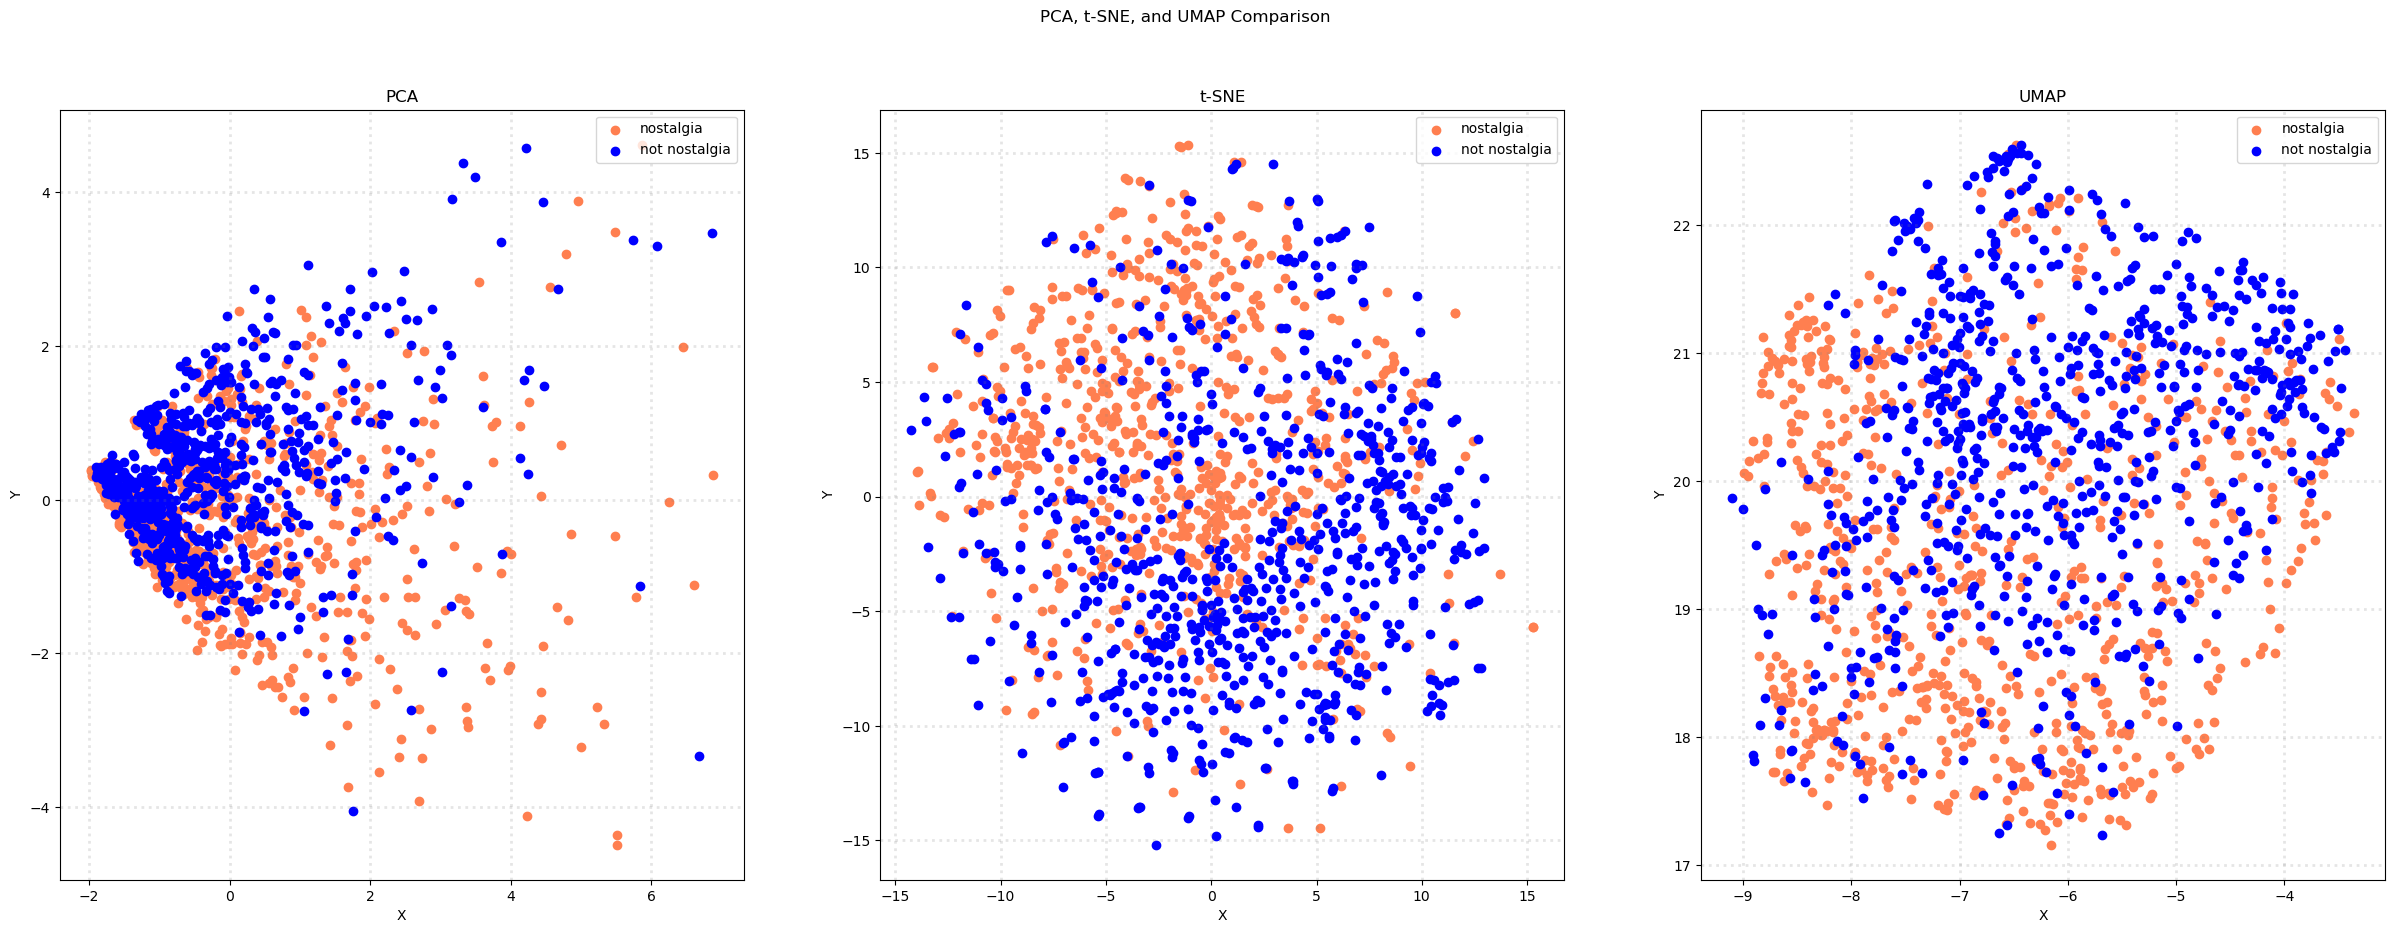

In [291]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [293]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

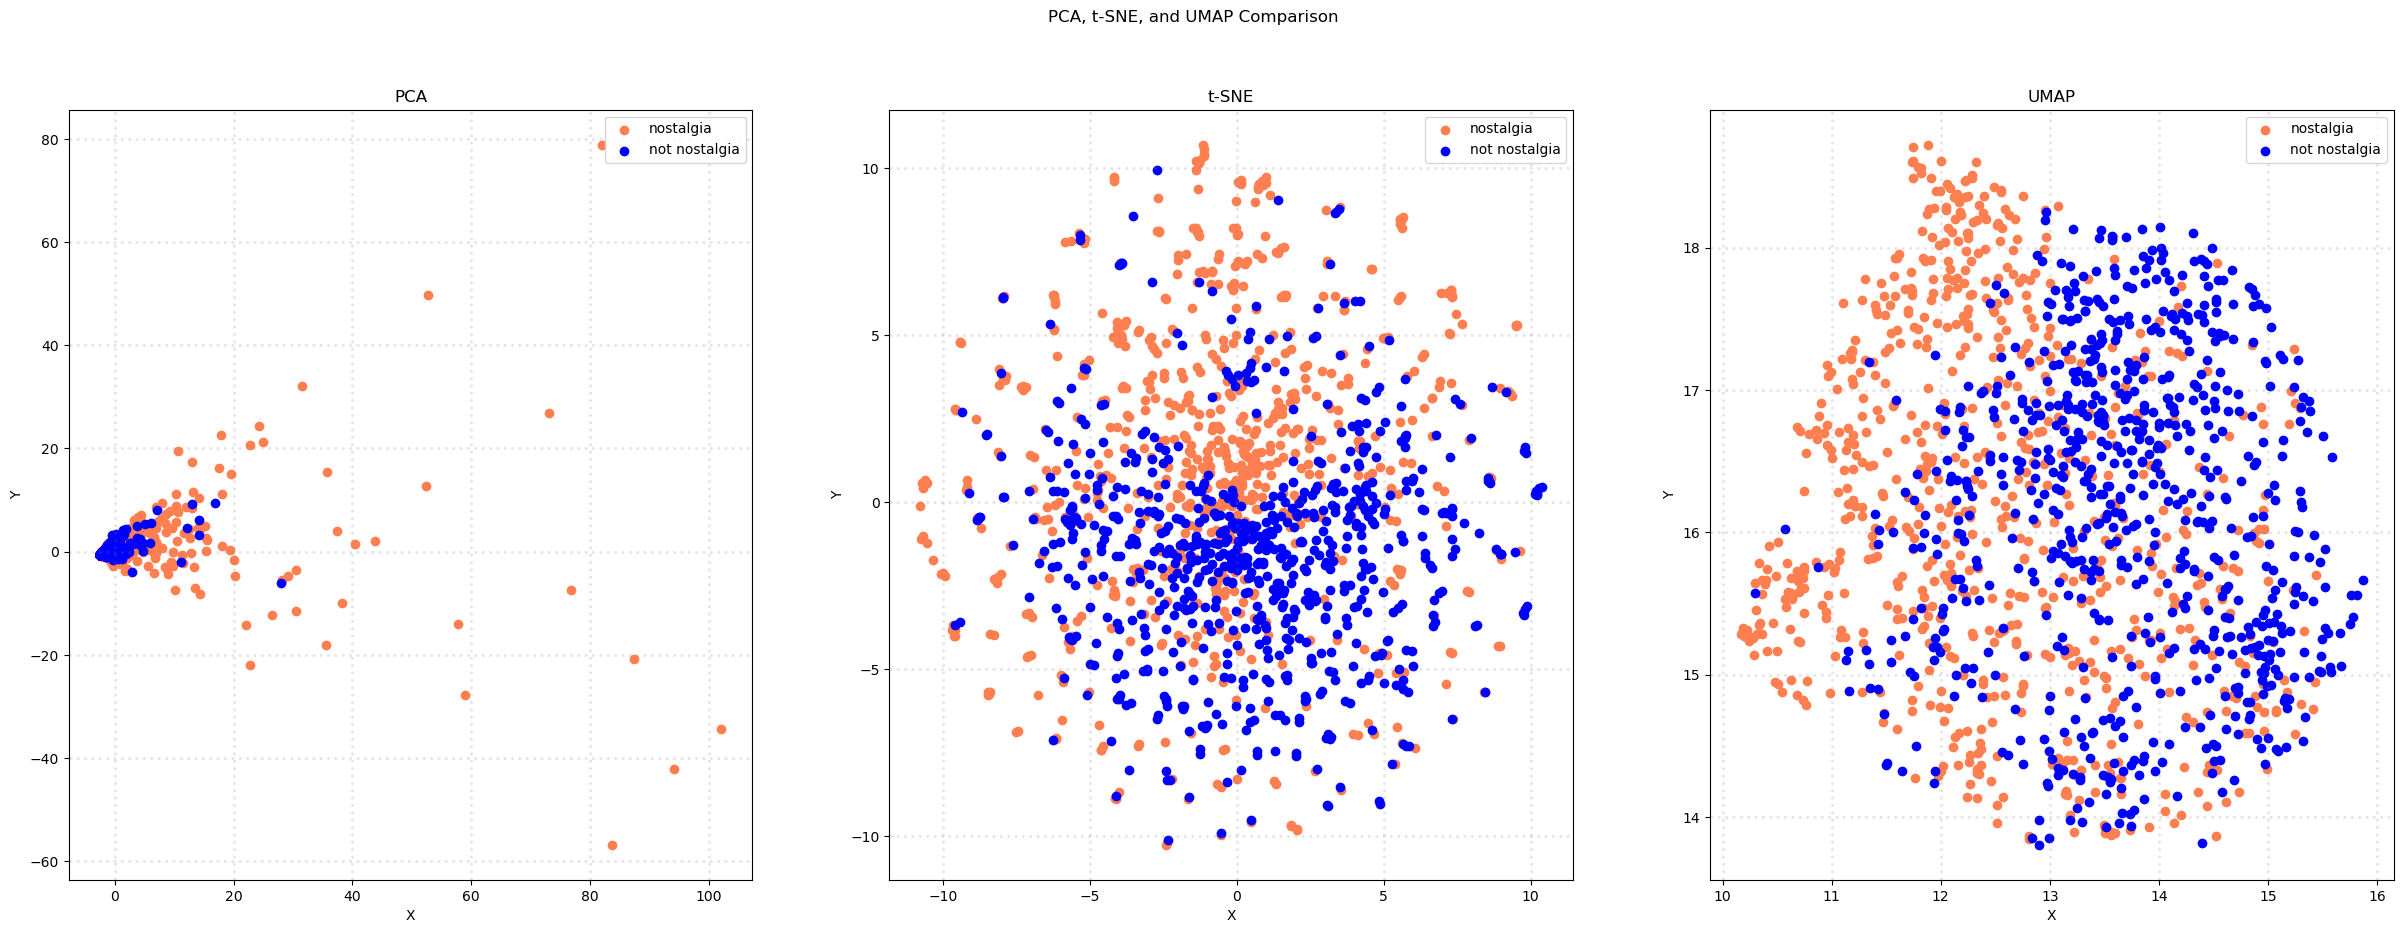

In [295]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

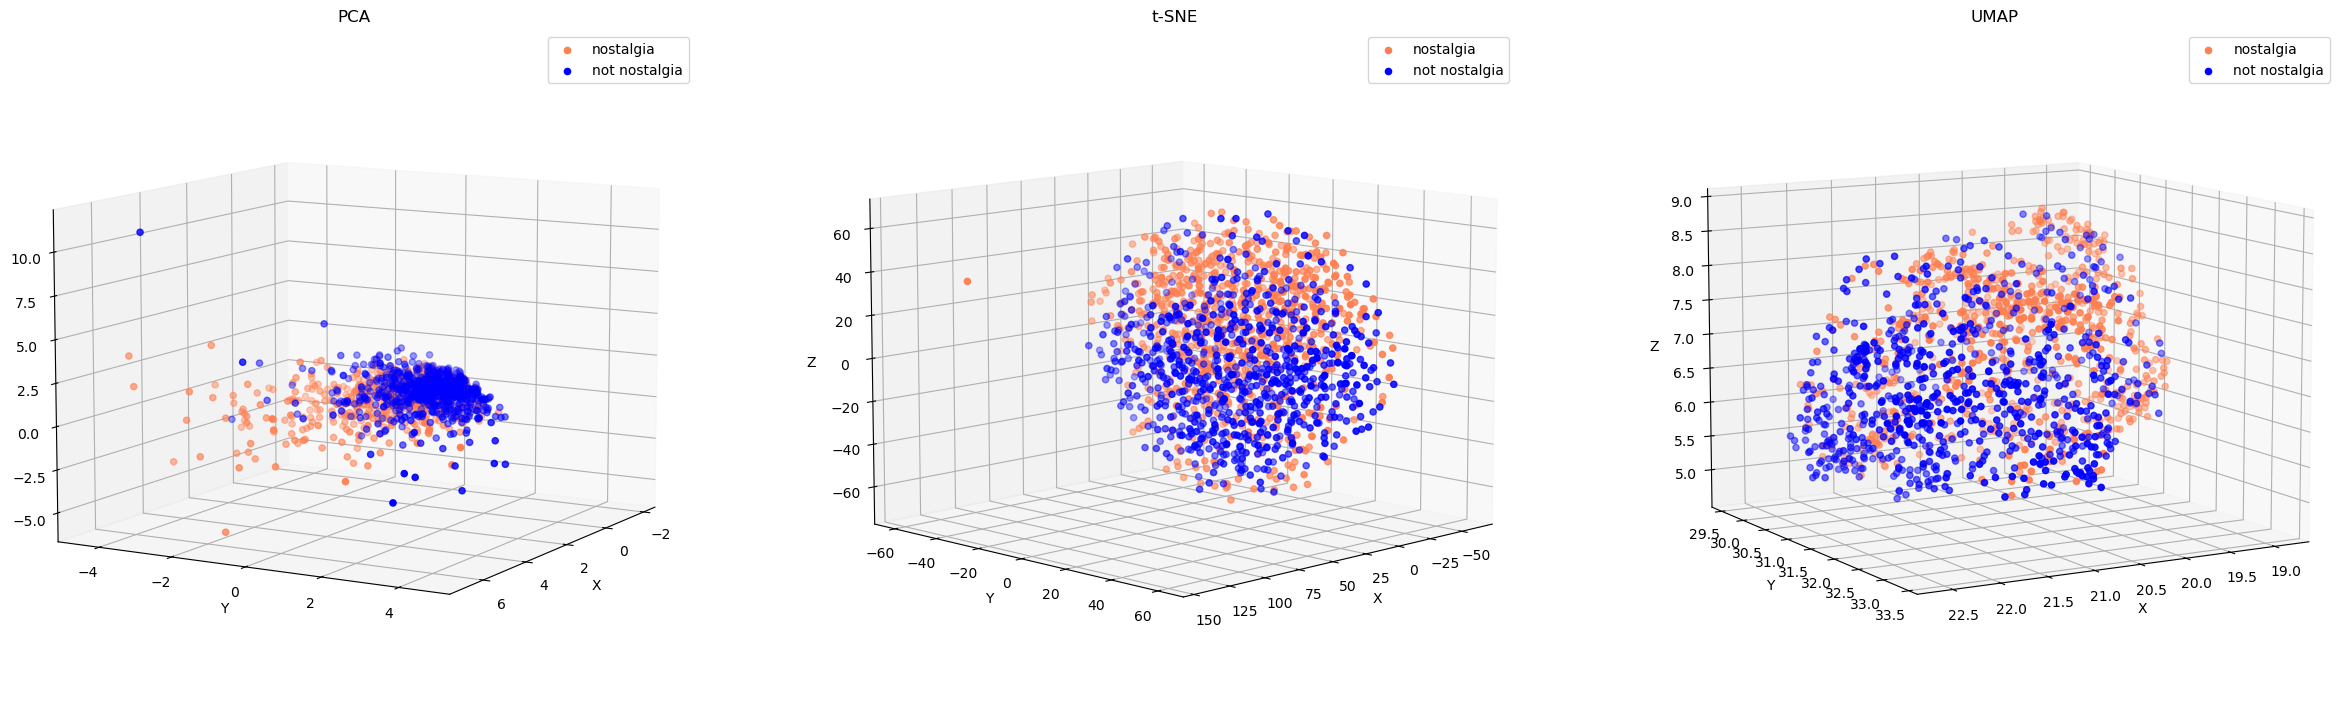

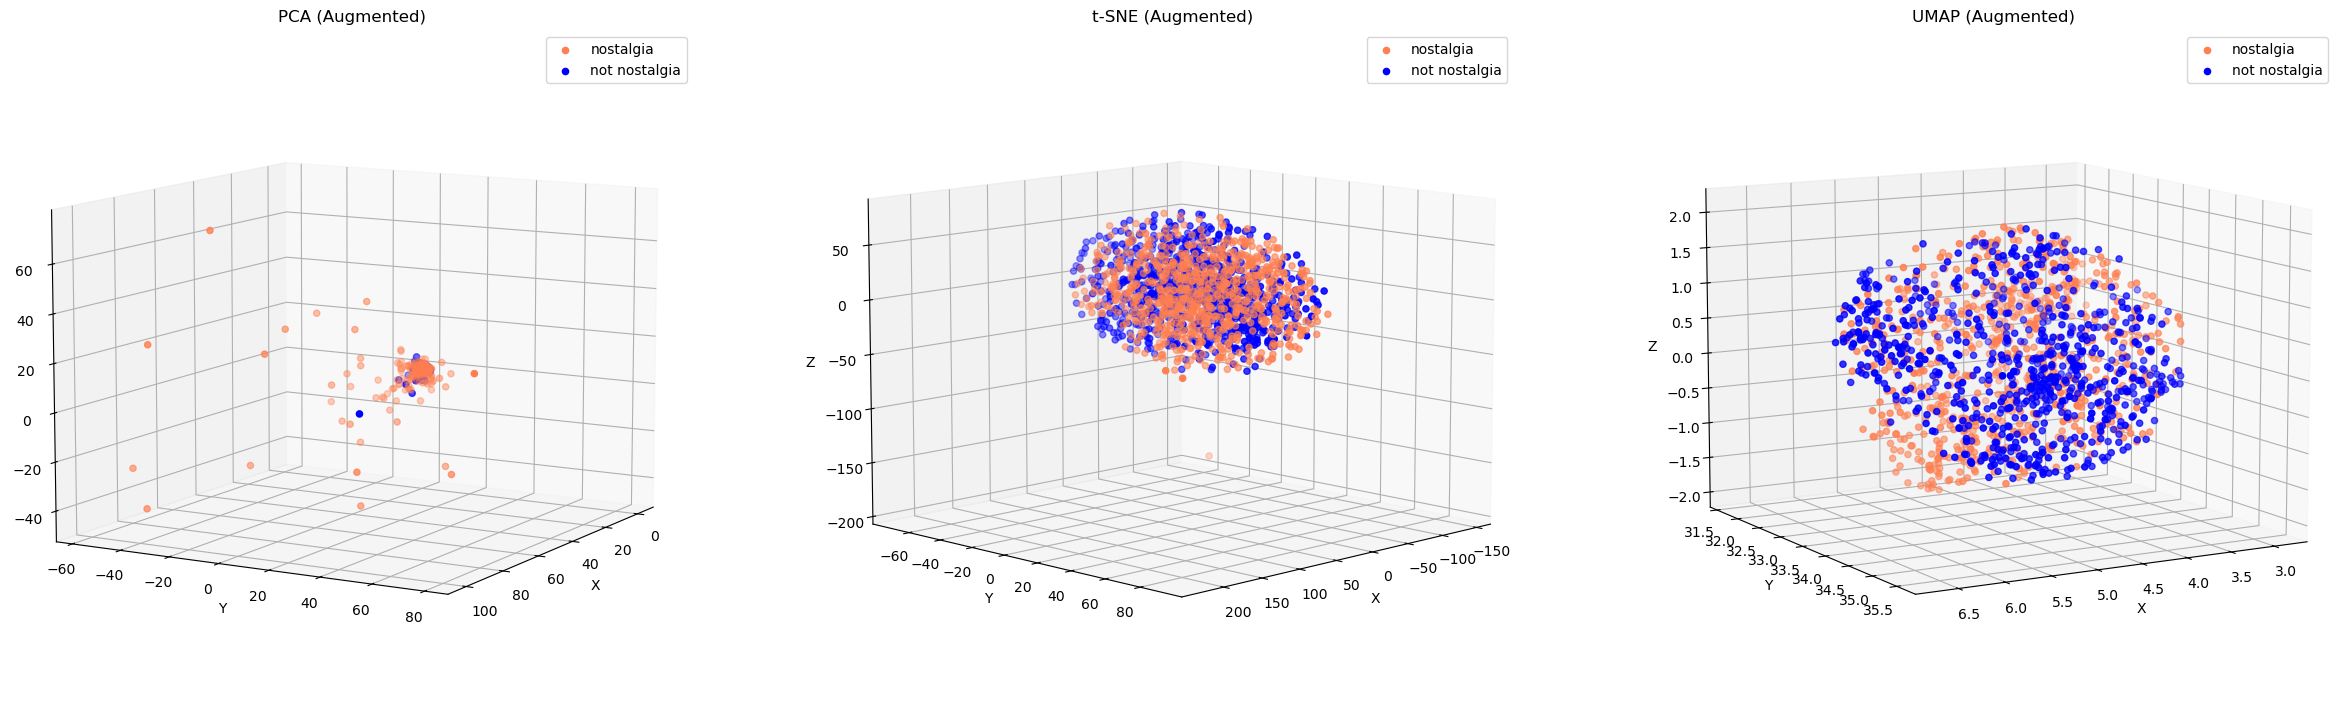

In [297]:
# Answer here
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X_pca_tdm = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

def plot_3d_scatter(ax, X_reduced, title, angle):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category][:, 0]
        ys = X_reduced[X['category_name'] == category][:, 1]
        zs = X_reduced[X['category_name'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, label=category, depthshade=True)
    
    ax.view_init(elev=10., azim=angle)  # Set the view angle
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

fig = plt.figure(figsize=(30, 10))

ax_pca = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax_pca, X_pca_tdm, 'PCA', angle=30)

ax_tsne = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax_tsne, X_tsne_tdm, 't-SNE', angle=45)

ax_umap = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax_umap, X_umap_tdm, 'UMAP', angle=60)

plt.show()

X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

fig = plt.figure(figsize=(30, 10))

ax_pca_aug = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax_pca_aug, X_pca_aug, 'PCA (Augmented)', angle=30)

ax_tsne_aug = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax_tsne_aug, X_tsne_aug, 't-SNE (Augmented)', angle=45)

ax_umap_aug = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax_umap_aug, X_umap_aug, 'UMAP (Augmented)', angle=60)

plt.show()

In [299]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [301]:
mlb = preprocessing.LabelBinarizer()

In [303]:
mlb.fit(X.category)

LabelBinarizer()

In [305]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [307]:
X[0:9]

,comment,category,category_name,unigrams,tokenized_text,bin_category
0,"I like this song very much, when I was in the ...",0,nostalgia,"[I, like, this, song, very, much, ,, when, I, ...","{name, Havu,, I, fellow, grade, for, Virginia,...",[0]
1,Nostalgia and sentimentality to the deceased,0,nostalgia,"[Nostalgia, and, sentimentality, to, the, dece...","{to, Nostalgia, and, deceased, sentimentality,...",[0]
2,Honey running over butter still cant describe...,1,not nostalgia,"[Honey, running, over, butter, still, cant, de...","{running, Honey, butter, cant, describe, voice...",[1]
3,This song always bring me back to my childhood,0,nostalgia,"[This, song, always, bring, me, back, to, my, ...","{always, me, to, This, back, song, bring, my, ...",[0]
4,Beautiful and I am offering to all our dear fr...,1,not nostalgia,"[Beautiful, and, I, am, offering, to, all, our...","{friends, I, wherever, Beautiful, am, dear, al...",[1]
5,What a beautiful song. I would love to fall In...,1,not nostalgia,"[What, a, beautiful, song, ., I, would, love, ...","{doc, love, I, to, song., In, beautiful, peace...",[1]
6,childhood favorite finally find the song. ton...,0,nostalgia,"[childhood, favorite, finally, find, the, song...","{of, finally, tons, song., memories, favorite,...",[0]
7,I was 14 when I first heard 17 year steve winw...,0,nostalgia,"[I, was, 14, when, I, first, heard, 17, year, ...","{winwood, I, boot, fantastic, MONO, am, no, 14...",[0]
8,love this song bring back good memories...,0,nostalgia,"[love, this, song, bring, back, good, memories...","{love, memories..., back, song, bring, good, t...",[0]


In [309]:
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,comment,category,category_name,unigrams,tokenized_text,bin_category,bin_category_name
0,"I like this song very much, when I was in the ...",0,nostalgia,"[I, like, this, song, very, much, ,, when, I, ...","{name, Havu,, I, fellow, grade, for, Virginia,...",[0],[0]
1,Nostalgia and sentimentality to the deceased,0,nostalgia,"[Nostalgia, and, sentimentality, to, the, dece...","{to, Nostalgia, and, deceased, sentimentality,...",[0],[0]
2,Honey running over butter still cant describe...,1,not nostalgia,"[Honey, running, over, butter, still, cant, de...","{running, Honey, butter, cant, describe, voice...",[1],[1]
3,This song always bring me back to my childhood,0,nostalgia,"[This, song, always, bring, me, back, to, my, ...","{always, me, to, This, back, song, bring, my, ...",[0],[0]
4,Beautiful and I am offering to all our dear fr...,1,not nostalgia,"[Beautiful, and, I, am, offering, to, all, our...","{friends, I, wherever, Beautiful, am, dear, al...",[1],[1]
5,What a beautiful song. I would love to fall In...,1,not nostalgia,"[What, a, beautiful, song, ., I, would, love, ...","{doc, love, I, to, song., In, beautiful, peace...",[1],[1]
6,childhood favorite finally find the song. ton...,0,nostalgia,"[childhood, favorite, finally, find, the, song...","{of, finally, tons, song., memories, favorite,...",[0],[0]
7,I was 14 when I first heard 17 year steve winw...,0,nostalgia,"[I, was, 14, when, I, first, heard, 17, year, ...","{winwood, I, boot, fantastic, MONO, am, no, 14...",[0],[0]
8,love this song bring back good memories...,0,nostalgia,"[love, this, song, bring, back, good, memories...","{love, memories..., back, song, bring, good, t...",[0],[0]


In [313]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [315]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["I wasn't part of the generation that grew up with this song, but I'll have to admit that I like this song more than I like the songs these days. "]
["There's no soul in today's music, unlike songs from the 50's and 60's."]
["Damn!!! I remember this moment when I was 20 or 21 depending on whether it was before or after Oct. 3rd of that year. I reconnected with an old GF I hadn't see in a few years and we hooked up again and her, her mother and I watched this live on TV back then at her mothers house. I think her name was Anna ..who knows what her last name might be now. Also I'd like to acknowledge Anita Macias...who I ran into at a grocery store about 20 years ago or more "]


In [317]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [319]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.136788
Cosine Similarity using count bw 1 and 3: 0.182592
Cosine Similarity using count bw 2 and 3: 0.094782
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/f5/qf0c5g2x3z59ykyp4p7vd0qw0000gn/T/ipykernel_69374/452772485.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
/var/folders/f5/qf0c5g2x3z59ykyp4p7vd0qw0000gn/T/ipykernel_69374/452772485.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
/var/folders/f5/qf0c5g2x3z59ykyp4p7vd0qw0000gn/T/ipykernel_69374/452772485.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single elemen

In [321]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

In [323]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1397,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [325]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
1035,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [327]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8888888888888888

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8398    0.9598    0.8958       224
not nostalgia     0.9536    0.8186    0.8810       226

     accuracy                         0.8889       450
    macro avg     0.8967    0.8892    0.8884       450
 weighted avg     0.8970    0.8889    0.8884       450



In [329]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

In [331]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,the and was is on when this,the and in is on when this,in was is on when this,and was is on when this,and in is on when this,the was is on when this,the in is on when this,the and is on when this,was is on when this,brings was it my
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1397,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [333]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,the and was is on when this,the and in is on when this,in was is on when this,and was is on when this,and in is on when this,the was is on when this,the in is on when this,the and is on when this,was is on when this,brings was it my
1035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [335]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.7666666666666667

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.9048    0.5938    0.7170       224
not nostalgia     0.6997    0.9381    0.8015       226

     accuracy                         0.7667       450
    macro avg     0.8022    0.7659    0.7592       450
 weighted avg     0.8018    0.7667    0.7594       450

